# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date


# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a DataFrame from a CSV file

In [ ]:
# read in the data and print the first five rows
# use the Symbol column as the index, and 
# only read in columns in positions 0, 2, 3, 7
nifty50 = pd.read_csv("/mnt/e/iitm course/da2402-data-curation-and-visualisation/basic Python/nifty50.csv")
                        
                                     #usecols=[0, 2, 3, 7]

In [64]:
# peek at the first 5 rows of the data using .head()
nifty50.head()

,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,INDICATIVE CLOSE \n,CHNG \n,%CHNG \n,VOLUME \n(shares),VALUE \n (₹ Crores),52W H \n,52W L \n,30 D %CHNG \n,365 D % CHNG \n 02-Aug-2024
0,NIFTY 50,"24,720.25","24,733.10","24,590.30","24,722.75","24,649.55",-,-73.20,-0.30,"25,18,49,778","23,815.20","26,277.35","21,743.65",-3.19,-0.28
1,TITAN,"3,356.30","3,443.00","3,348.00","3,356.30","3,424.00",-,67.70,2.02,"8,37,335",285.13,"3,867.00","2,925.00",-7.29,-1.28
2,INDUSINDBK,820.00,848.70,810.05,804.05,817.40,-,13.35,1.66,"1,89,82,770","1,570.06","1,498.00",606.00,-4.33,-41.67
3,SBILIFE,"1,833.30","1,860.40","1,818.70","1,831.50","1,860.00",-,28.50,1.56,"12,51,783",231.37,"1,936.00","1,372.55",3.18,6.42
4,MARUTI,"12,400.00","12,577.00","12,370.00","12,365.00","12,543.00",-,178.00,1.44,"2,33,560",292.25,"13,541.65","10,725.00",-0.86,-1.49


In [4]:
nifty50.dtypes

SYMBOL \n            object
OPEN \n              object
HIGH \n              object
LOW \n               object
PREV. CLOSE \n       object
LTP \n               object
VOLUME \n(shares)    object
dtype: object

In [5]:
# how many rows of data?  Should be 500
len(nifty50)

51

In [6]:
# what is the shape?
nifty50.shape

(51, 7)

In [49]:
# what is the size?
nifty50.size

357

In [50]:
# examine the index
nifty50.index

RangeIndex(start=0, stop=51, step=1)

In [65]:
# get the columns
nifty50.columns

Index(['SYMBOL \n', 'OPEN \n', 'HIGH \n', 'LOW \n', 'PREV. CLOSE \n', 'LTP \n',
       'INDICATIVE CLOSE \n', 'CHNG \n', '%CHNG \n', 'VOLUME \n(shares)',
       'VALUE \n (₹ Crores)', '52W H \n', '52W L \n', '30 D   %CHNG \n',
       '365 D % CHNG \n 02-Aug-2024'],
      dtype='object')

In [3]:
col_names={col_name:col_name.replace("\n","").strip().title().split('(')[0] for col_name in nifty50.columns}
col_names
nifty50=nifty50.rename(columns=col_names)
nifty50.head()
print(nifty50.columns)

Index(['Symbol', 'Open', 'High', 'Low', 'Prev. Close', 'Ltp',
       'Indicative Close', 'Chng', '%Chng', 'Volume ', 'Value  ', '52W H',
       '52W L', '30 D   %Chng', '365 D % Chng  02-Aug-2024'],
      dtype='object')


In [68]:
rename_dict={col:col.title().replace(" \n","") for col in nifty50.columns}
rename_dict
nifty50 =nifty50.rename(columns=rename_dict)
nifty50.columns
nifty50=nifty50.set_index('Symbol')


In [70]:
nifty50.columns

Index(['Open', 'High', 'Low', 'Prev. Close', 'Ltp', 'Indicative Close', 'Chng',
       '%Chng', 'Volume', 'Value', '52W H', '52W L', '30 D   %Chng',
       '365 D % Chng  02-Aug-2024'],
      dtype='object')

# Selecting columns of a DataFrame

In [4]:
# retrieve the Sector column
nifty50['Ltp'].head()

0    24,649.55
1     3,424.00
2       817.40
3     1,860.00
4    12,543.00
Name: Ltp, dtype: object

In [19]:
nifty50['Ltp']=nifty50['Ltp'].str.replace(",","").astype(float)
nifty50.dtypes

Symbol          object
Open            object
High            object
Low             object
Prev. Close     object
Ltp            float64
Volume          object
dtype: object

In [20]:
nifty50.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Prev. Close', 'Ltp', 'Volume'], dtype='object')

In [25]:
nifty50.dtypes

Symbol          object
Open           float64
High           float64
Low            float64
Prev. Close    float64
Ltp            float64
Volume          object
dtype: object

In [6]:
clean_cols=['Open', 'High', 'Low', 'Prev. Close','Ltp']
#nifty50[clean_cols]=nifty50[clean_cols].str.replace(",","").astype(float)
nifty50[clean_cols] = nifty50[clean_cols].apply(lambda col: col.str.replace(',', '', regex=False))
nifty50

,Symbol,Open,High,Low,Prev. Close,Ltp,Indicative Close,Chng,%Chng,Volume,Value,52W H,52W L,30 D %Chng,365 D % Chng 02-Aug-2024
0,NIFTY 50,24720.25,24733.10,24590.30,24722.75,24649.55,-,-73.20,-0.30,"25,18,49,778","23,815.20","26,277.35","21,743.65",-3.19,-0.28
1,TITAN,3356.30,3443.00,3348.00,3356.30,3424.00,-,67.70,2.02,"8,37,335",285.13,"3,867.00","2,925.00",-7.29,-1.28
2,INDUSINDBK,820.00,848.70,810.05,804.05,817.40,-,13.35,1.66,"1,89,82,770","1,570.06","1,498.00",606.00,-4.33,-41.67
3,SBILIFE,1833.30,1860.40,1818.70,1831.50,1860.00,-,28.50,1.56,"12,51,783",231.37,"1,936.00","1,372.55",3.18,6.42
4,MARUTI,12400.00,12577.00,12370.00,12365.00,12543.00,-,178.00,1.44,"2,33,560",292.25,"13,541.65","10,725.00",-0.86,-1.49
5,COALINDIA,376.00,380.70,374.50,374.70,379.80,-,5.10,1.36,"68,46,687",258.48,543.55,349.25,-1.71,-27.65
6,TRENT,5245.00,5356.00,5200.00,5249.00,5320.00,-,71.00,1.35,"9,76,873",517.66,"8,345.00","4,488.00",-2.54,-3.99
7,EICHERMOT,5625.00,5690.00,5584.50,5621.00,5684.00,-,63.00,1.12,"4,58,305",258.62,"5,906.50","4,508.75",0.92,20.19
8,BHARTIARTL,1920.00,1937.60,1912.10,1914.60,1930.30,-,15.70,0.82,"51,67,672",996.80,"2,045.80","1,422.60",-4.23,29.32
9,BAJFINANCE,889.00,893.60,882.40,885.30,892.30,-,7.00,0.79,"44,46,791",395.12,978.80,642.50,-3.61,-86.74


In [71]:
clean_cols=['Open', 'High', 'Low', 'Prev. Close','Ltp']
for col in clean_cols:
    try:
        nifty50[col]=nifty50[col].str.replace(",","").astype(float)
    except:
        continue
nifty50.dtypes

Open                         float64
High                         float64
Low                          float64
Prev. Close                  float64
Ltp                          float64
Indicative Close              object
Chng                         float64
%Chng                        float64
Volume                        object
Value                         object
52W H                         object
52W L                         object
30 D   %Chng                 float64
365 D % Chng  02-Aug-2024     object
dtype: object

In [27]:
nifty50['Ltp'].astype(float)

ValueError: could not convert string to float: '24,649.55'

In [ ]:
type(nifty50['Ltp'])

pandas.core.series.Series

In [65]:
# retrieve the Open and Close Value columns
nifty50[['Open', 'High']].head()

                 Open       High
Symbol                          
NIFTY 50    24,720.25  24,733.10
TITAN        3,356.30   3,443.00
INDUSINDBK     820.00     848.70
SBILIFE      1,833.30   1,860.40
MARUTI      12,400.00  12,577.00

In [66]:
# show that this is a DataFrame
type(nifty50[['Open', 'High']])

pandas.core.frame.DataFrame

In [67]:
# attribute access of column by name
nifty50.Open

Symbol
NIFTY 50      24,720.25
TITAN          3,356.30
INDUSINDBK       820.00
SBILIFE        1,833.30
MARUTI        12,400.00
                ...    
CIPLA          1,513.50
ADANIENT       2,370.00
INFY           1,478.70
RELIANCE       1,411.00
ADANIPORTS     1,392.00
Name: Open, Length: 51, dtype: object

# Selecting rows of a DataFrame

In [68]:
# get row with label MMM
# returned as a Series
nifty50.loc['INFY']

Open                 1,478.70
High                 1,478.70
Low                  1,455.00
Prev. Close          1,480.50
Ltp                  1,460.00
Volume(Shares)    1,02,13,323
Name: INFY, dtype: object

In [69]:
# rows with label MMM and MSFT
# this is a DataFrame result
nifty50.loc[['INFY', 'TCS']]

            Open      High       Low Prev. Close       Ltp Volume(Shares)
Symbol                                                                   
INFY    1,478.70  1,478.70  1,455.00    1,480.50  1,460.00    1,02,13,323
TCS     3,074.40  3,077.50  3,042.00    3,074.40  3,060.00      19,27,996

In [70]:
# get rows in location 0 and 2
nifty50.iloc[[0, 2]]

                 Open       High        Low Prev. Close        Ltp  \
Symbol                                                               
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24,649.55   
INDUSINDBK     820.00     848.70     810.05      804.05     817.40   

           Volume(Shares)  
Symbol                     
NIFTY 50     25,18,49,778  
INDUSINDBK    1,89,82,770  

In [72]:
# get the location of MMM and A in the index
i1 = nifty50.index.get_loc('INFY')
i2 = nifty50.index.get_loc('TCS')
(i1, i2)

(48, 33)

In [ ]:
# and get the rows
nifty50.iloc[[i1,i2]]

SyntaxError: invalid syntax (1505569237.py, line 2)

# Scalar lookup by label or location using .at[] and .iat[] 

In [74]:
# by label in both the index and column
nifty50.at['INFY', 'Ltp']

'1,460.00'

In [75]:
# by location.  Row 0, column 1
nifty50.iat[0, 1]

'24,733.10'

In [16]:
nifty50.set_index('Symbol',inplace=True)
nifty50

,Open,High,Low,Prev. Close,Ltp,Volume
Symbol,,,,,,
NIFTY 50,24720.25,24733.10,24590.30,24722.75,"24,649.55","25,18,49,778"
TITAN,3356.30,3443.00,3348.00,3356.30,"3,424.00","8,37,335"
INDUSINDBK,820.00,848.70,810.05,804.05,817.40,"1,89,82,770"
SBILIFE,1833.30,1860.40,1818.70,1831.50,"1,860.00","12,51,783"
MARUTI,12400.00,12577.00,12370.00,12365.00,"12,543.00","2,33,560"
COALINDIA,376.00,380.70,374.50,374.70,379.80,"68,46,687"
TRENT,5245.00,5356.00,5200.00,5249.00,"5,320.00","9,76,873"
EICHERMOT,5625.00,5690.00,5584.50,5621.00,"5,684.00","4,58,305"
BHARTIARTL,1920.00,1937.60,1912.10,1914.60,"1,930.30","51,67,672"


In [21]:
nifty50.at['INFY','Open']

1478.7

# Adding new columns with [] and .insert()

In [13]:
# make a copy so that we keep the original data unchanged
nifty50_copy = nifty50.copy()
# add the new column
nifty50_copy['RoundedPrice'] = nifty50['Ltp'].round()
nifty50_copy[:2]

               Open       High        Low Prev. Close       Ltp  \
Symbol                                                            
NIFTY 50  24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN      3,356.30   3,443.00   3,348.00    3,356.30   3424.00   

         Volume(Shares)  RoundedPrice  
Symbol                                 
NIFTY 50   25,18,49,778       24650.0  
TITAN          8,37,335        3424.0  

In [14]:
# make a copy so that we keep the original data unchanged
copy = nifty50.copy()
# insert sp500.Price * 2 as the 
# second column in the DataFrame
copy.insert(1, 'RoundedPrice', nifty50.Ltp.round())
copy[:2]

               Open  RoundedPrice       High        Low Prev. Close       Ltp  \
Symbol                                                                          
NIFTY 50  24,720.25       24650.0  24,733.10  24,590.30   24,722.75  24649.55   
TITAN      3,356.30        3424.0   3,443.00   3,348.00    3,356.30   3424.00   

         Volume(Shares)  
Symbol                   
NIFTY 50   25,18,49,778  
TITAN          8,37,335  

# Adding columns through enlargement

In [23]:
# copy of subset / slice
ss = nifty50[:3].copy()
# add the new column initialized to 0
ss.loc[:,'PER'] = 0
# take a look at the results
ss

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

           Volume(Shares)  PER  
Symbol                          
NIFTY 50     25,18,49,778    0  
TITAN            8,37,335    0  
INDUSINDBK    1,89,82,770    0  

In [23]:
# copy of subset / slice
ss = nifty50[:3].copy()
# add the new column initialized with random numbers
np.random.seed(123456)
ss.loc[:,'PER'] = pd.Series(np.random.normal(size=3), index=ss.index)
# take a look at the results
ss

,Open,High,Low,Prev. Close,Ltp,Volume,PER
Symbol,,,,,,,
NIFTY 50,24720.25,24733.1,24590.30,24722.75,"24,649.55","25,18,49,778",0.469112
TITAN,3356.30,3443.0,3348.00,3356.30,"3,424.00","8,37,335",-0.282863
INDUSINDBK,820.00,848.7,810.05,804.05,817.40,"1,89,82,770",-1.509059


# Adding columns using concatenation

In [29]:
# create a DataFrame with only the RoundedPrice column
rounded_price = pd.DataFrame({'RoundedPrice':    
                              nifty50.Ltp.round()})
# concatenate along the columns axis
concatenated = pd.concat([nifty50, rounded_price], axis=1)
concatenated[:5]

,Open,High,Low,Prev. Close,Ltp,Volume,RoundedPrice
Symbol,,,,,,,
NIFTY 50,24720.25,24733.1,24590.30,24722.75,24649.55,"25,18,49,778",24650.0
TITAN,3356.30,3443.0,3348.00,3356.30,3424.00,"8,37,335",3424.0
INDUSINDBK,820.00,848.7,810.05,804.05,817.40,"1,89,82,770",817.0
SBILIFE,1833.30,1860.4,1818.70,1831.50,1860.00,"12,51,783",1860.0
MARUTI,12400.00,12577.0,12370.00,12365.00,12543.00,"2,33,560",12543.0


In [26]:
# create a DataFrame with only the RoundedPrice column
rounded_price = pd.DataFrame({'Price': nifty50.Ltp.round()})
rounded_price[:5]

              Price
Symbol             
NIFTY 50    24650.0
TITAN        3424.0
INDUSINDBK    817.0
SBILIFE      1860.0
MARUTI      12543.0

# Reordering columns

In [28]:
# return a new DataFrame with the columns reversed
reversed_column_names = nifty50.columns[::-1]
nifty50[reversed_column_names][:5]

           Volume(Shares)       Ltp Prev. Close        Low       High  \
Symbol                                                                  
NIFTY 50     25,18,49,778  24649.55   24,722.75  24,590.30  24,733.10   
TITAN            8,37,335   3424.00    3,356.30   3,348.00   3,443.00   
INDUSINDBK    1,89,82,770    817.40      804.05     810.05     848.70   
SBILIFE         12,51,783   1860.00    1,831.50   1,818.70   1,860.40   
MARUTI           2,33,560  12543.00   12,365.00  12,370.00  12,577.00   

                 Open  
Symbol                 
NIFTY 50    24,720.25  
TITAN        3,356.30  
INDUSINDBK     820.00  
SBILIFE      1,833.30  
MARUTI      12,400.00  

# Deleting columns

In [32]:
nifty50.columns

Index(['Open', 'High', 'Low', 'Prev. Close', 'Ltp', 'Volume(Shares)'], dtype='object')

In [33]:
# Example of using del to delete a column
# make a copy as this is done in-place
copy = nifty50.copy()
del copy['Prev. Close']
copy[:2]

               Open       High        Low       Ltp Volume(Shares)
Symbol                                                            
NIFTY 50  24,720.25  24,733.10  24,590.30  24649.55   25,18,49,778
TITAN      3,356.30   3,443.00   3,348.00   3424.00       8,37,335

In [ ]:
# Example of using pop to remove a column from a DataFrame
# first make a copy of a subset of the data frame as
# pop works in place
# this will remove Volume and return it as a series
popped = copy.pop('Volume(Shares)')
# Volume column removed in-place
copy[:2]

               Open       High        Low       Ltp
Symbol                                             
NIFTY 50  24,720.25  24,733.10  24,590.30  24649.55
TITAN      3,356.30   3,443.00   3,348.00   3424.00

In [ ]:
# and we have the Volume column as the result of the pop
popped[:5]

Symbol
NIFTY 50      25,18,49,778
TITAN             8,37,335
INDUSINDBK     1,89,82,770
SBILIFE          12,51,783
MARUTI            2,33,560
Name: Volume(Shares), dtype: object

In [37]:
# Example of using drop to remove a column 
# this will return a new DataFrame with 'Open removed
# the copy DataFrame is not modified
afterdrop = copy.drop(['Open'], axis = 1)
afterdrop[:5]

                 High        Low       Ltp
Symbol                                    
NIFTY 50    24,733.10  24,590.30  24649.55
TITAN        3,443.00   3,348.00   3424.00
INDUSINDBK     848.70     810.05    817.40
SBILIFE      1,860.40   1,818.70   1860.00
MARUTI      12,577.00  12,370.00  12543.00

# Appending rows from other DataFrame objects with .append()

In [38]:
# copy the first three rows of nifty50
df1 = nifty50.iloc[0:3].copy()
# copy 10th and 11th rows
df2 = nifty50.iloc[[10, 11, 2]]
# append df1 and df2
appended = df1.append(df2)
# the result is the rows of the first followed by 
# those of the second
appended

/tmp/ipykernel_6109/1148767137.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended = df1.append(df2)


                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
SHRIRAMFIN     630.50     633.20     621.15      624.90    629.00   
SBIN           798.00     804.05     796.30      795.70    800.50   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

           Volume(Shares)  
Symbol                     
NIFTY 50     25,18,49,778  
TITAN            8,37,335  
INDUSINDBK    1,89,82,770  
SHRIRAMFIN      39,96,694  
SBIN            73,81,537  
INDUSINDBK    1,89,82,770  

In [40]:
appended2=pd.concat([df1,df2])
appended2

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
SHRIRAMFIN     630.50     633.20     621.15      624.90    629.00   
SBIN           798.00     804.05     796.30      795.70    800.50   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

           Volume(Shares)  
Symbol                     
NIFTY 50     25,18,49,778  
TITAN            8,37,335  
INDUSINDBK    1,89,82,770  
SHRIRAMFIN      39,96,694  
SBIN            73,81,537  
INDUSINDBK    1,89,82,770  

In [44]:
# data frame using df1.index and just a PER column
# also a good example of using a scalar value
# to initialize multiple rows
df3 = pd.DataFrame(0, 
                   index=df1.index,
                   columns=['PER1'])
df3

            PER1
Symbol          
NIFTY 50       0
TITAN          0
INDUSINDBK     0

In [45]:
# append df1 and df3
# each has three rows, so 6 rows is the result
# df1 had no PER column, so NaN from for those rows
# df3 had no BookValue, Price or Sector, so NaN's
df1.append(df3)

/tmp/ipykernel_6109/3943592431.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df3)


                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
NIFTY 50          NaN        NaN        NaN         NaN       NaN   
TITAN             NaN        NaN        NaN         NaN       NaN   
INDUSINDBK        NaN        NaN        NaN         NaN       NaN   

           Volume(Shares)  PER1  
Symbol                           
NIFTY 50     25,18,49,778   NaN  
TITAN            8,37,335   NaN  
INDUSINDBK    1,89,82,770   NaN  
NIFTY 50              NaN   0.0  
TITAN                 NaN   0.0  
INDUSINDBK            NaN   0.0  

In [46]:
# ignore index labels, create default index
df1.append(df3, ignore_index=True)

/tmp/ipykernel_6109/345374009.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df3, ignore_index=True)


        Open       High        Low Prev. Close       Ltp Volume(Shares)  PER1
0  24,720.25  24,733.10  24,590.30   24,722.75  24649.55   25,18,49,778   NaN
1   3,356.30   3,443.00   3,348.00    3,356.30   3424.00       8,37,335   NaN
2     820.00     848.70     810.05      804.05    817.40    1,89,82,770   NaN
3        NaN        NaN        NaN         NaN       NaN            NaN   0.0
4        NaN        NaN        NaN         NaN       NaN            NaN   0.0
5        NaN        NaN        NaN         NaN       NaN            NaN   0.0

# Concatenating rows

In [47]:
# copy the first three rows of sp500
df1 = nifty50.iloc[0:3].copy()
# copy 10th and 11th rows
df2 = nifty50.iloc[[10, 11, 2]]
# pass them as a list
pd.concat([df1, df2])

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
SHRIRAMFIN     630.50     633.20     621.15      624.90    629.00   
SBIN           798.00     804.05     796.30      795.70    800.50   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

           Volume(Shares)  
Symbol                     
NIFTY 50     25,18,49,778  
TITAN            8,37,335  
INDUSINDBK    1,89,82,770  
SHRIRAMFIN      39,96,694  
SBIN            73,81,537  
INDUSINDBK    1,89,82,770  

In [48]:
# copy df2
df2_2 = df2.copy()
# add a column to df2_2 that is not in df1
df2_2.insert(3, 'BV', pd.Series(0, index=df2.index))
# see what it looks like
df2_2

              Open    High     Low  BV Prev. Close    Ltp Volume(Shares)
Symbol                                                                  
SHRIRAMFIN  630.50  633.20  621.15   0      624.90  629.0      39,96,694
SBIN        798.00  804.05  796.30   0      795.70  800.5      73,81,537
INDUSINDBK  820.00  848.70  810.05   0      804.05  817.4    1,89,82,770

In [49]:
# now concatenate
pd.concat([df1, df2_2])

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
SHRIRAMFIN     630.50     633.20     621.15      624.90    629.00   
SBIN           798.00     804.05     796.30      795.70    800.50   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

           Volume(Shares)   BV  
Symbol                          
NIFTY 50     25,18,49,778  NaN  
TITAN            8,37,335  NaN  
INDUSINDBK    1,89,82,770  NaN  
SHRIRAMFIN      39,96,694  0.0  
SBIN            73,81,537  0.0  
INDUSINDBK    1,89,82,770  0.0  

In [50]:
# specify keys
r = pd.concat([df1, df2_2], keys=['df1', 'df2'])
r

                     Open       High        Low Prev. Close       Ltp  \
    Symbol                                                              
df1 NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
    TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
    INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
df2 SHRIRAMFIN     630.50     633.20     621.15      624.90    629.00   
    SBIN           798.00     804.05     796.30      795.70    800.50   
    INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

               Volume(Shares)   BV  
    Symbol                          
df1 NIFTY 50     25,18,49,778  NaN  
    TITAN            8,37,335  NaN  
    INDUSINDBK    1,89,82,770  NaN  
df2 SHRIRAMFIN      39,96,694  0.0  
    SBIN            73,81,537  0.0  
    INDUSINDBK    1,89,82,770  0.0  

# Adding and replacing rows via setting with enlargement

In [52]:
# get a small subset of the nifty50 
# make sure to copy the slice to make a copy
ss = nifty50[:3].copy()
# create a new row with index label FOO
# and assign some values to the columns via a list
ss['FOO'] = ['the sector', 100, 110]
ss

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   

           Volume(Shares)         FOO  
Symbol                                 
NIFTY 50     25,18,49,778  the sector  
TITAN            8,37,335         100  
INDUSINDBK    1,89,82,770         110  

# Removing rows using .drop()

In [53]:
# get a copy of the first 5 rows of nifty50
ss = nifty50[:5]
ss

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
TITAN        3,356.30   3,443.00   3,348.00    3,356.30   3424.00   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
SBILIFE      1,833.30   1,860.40   1,818.70    1,831.50   1860.00   
MARUTI      12,400.00  12,577.00  12,370.00   12,365.00  12543.00   

           Volume(Shares)  
Symbol                     
NIFTY 50     25,18,49,778  
TITAN            8,37,335  
INDUSINDBK    1,89,82,770  
SBILIFE         12,51,783  
MARUTI           2,33,560  

In [55]:
# drop rows with labels ABT and ACN
afterdrop = ss.drop(['TITAN', 'SBILIFE'])
afterdrop[:5]

                 Open       High        Low Prev. Close       Ltp  \
Symbol                                                              
NIFTY 50    24,720.25  24,733.10  24,590.30   24,722.75  24649.55   
INDUSINDBK     820.00     848.70     810.05      804.05    817.40   
MARUTI      12,400.00  12,577.00  12,370.00   12,365.00  12543.00   

           Volume(Shares)  
Symbol                     
NIFTY 50     25,18,49,778  
INDUSINDBK    1,89,82,770  
MARUTI           2,33,560  

# Removing rows using Boolean selection

In [56]:
# determine the rows where Price > 300
selection = nifty50.Ltp > 300
# report number of rows and number that will be dropped
(len(selection), selection.sum())

(51, 47)

In [57]:
# select the complement of the expression
# note the use of the complement of the selection
price_less_than_300 = nifty50[~selection]
price_less_than_300

             Open    High     Low Prev. Close     Ltp Volume(Shares)
Symbol                                                              
TATASTEEL  159.56  160.14  158.28      159.56  159.45    1,44,41,034
ONGC       235.50  236.00  233.05      234.83  234.30      95,62,689
WIPRO      246.05  246.95  244.53      246.05  245.45      73,83,968
POWERGRID  287.10  288.65  285.10      287.95  285.90    1,55,61,914

# Join and Merge

In [72]:
nifty_sector=pd.read_csv("/mnt/e/iitm course/da2402-data-curation-and-visualisation/basic Python/ind_nifty50list.csv")

In [73]:
nifty_sector.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034


In [74]:
nifty50.head()

,Open,High,Low,Prev. Close,Ltp,Indicative Close,Chng,%Chng,Volume,Value,52W H,52W L,30 D %Chng,365 D % Chng 02-Aug-2024
Symbol,,,,,,,,,,,,,,
NIFTY 50,24720.25,24733.1,24590.30,24722.75,24649.55,-,-73.20,-0.30,"25,18,49,778","23,815.20","26,277.35","21,743.65",-3.19,-0.28
TITAN,3356.30,3443.0,3348.00,3356.30,3424.00,-,67.70,2.02,"8,37,335",285.13,"3,867.00","2,925.00",-7.29,-1.28
INDUSINDBK,820.00,848.7,810.05,804.05,817.40,-,13.35,1.66,"1,89,82,770","1,570.06","1,498.00",606.00,-4.33,-41.67
SBILIFE,1833.30,1860.4,1818.70,1831.50,1860.00,-,28.50,1.56,"12,51,783",231.37,"1,936.00","1,372.55",3.18,6.42
MARUTI,12400.00,12577.0,12370.00,12365.00,12543.00,-,178.00,1.44,"2,33,560",292.25,"13,541.65","10,725.00",-0.86,-1.49


In [33]:
nifty_merge = nifty50.merge(nifty_sector,right_on='Symbol',how='inner',left_on='Symbol')

In [34]:
nifty_merge

,Symbol,Open,High,Low,Prev. Close,Ltp,Volume,Company Name,Industry,Series,ISIN Code
0,TITAN,3356.30,3443.00,3348.00,3356.30,3424.00,"8,37,335",Titan Company Ltd.,Consumer Durables,EQ,INE280A01028
1,INDUSINDBK,820.00,848.70,810.05,804.05,817.40,"1,89,82,770",IndusInd Bank Ltd.,Financial Services,EQ,INE095A01012
2,SBILIFE,1833.30,1860.40,1818.70,1831.50,1860.00,"12,51,783",SBI Life Insurance Company Ltd.,Financial Services,EQ,INE123W01016
3,MARUTI,12400.00,12577.00,12370.00,12365.00,12543.00,"2,33,560",Maruti Suzuki India Ltd.,Automobile and Auto Components,EQ,INE585B01010
4,COALINDIA,376.00,380.70,374.50,374.70,379.80,"68,46,687",Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014
5,TRENT,5245.00,5356.00,5200.00,5249.00,5320.00,"9,76,873",Trent Ltd.,Consumer Services,EQ,INE849A01020
6,EICHERMOT,5625.00,5690.00,5584.50,5621.00,5684.00,"4,58,305",Eicher Motors Ltd.,Automobile and Auto Components,EQ,INE066A01021
7,BHARTIARTL,1920.00,1937.60,1912.10,1914.60,1930.30,"51,67,672",Bharti Airtel Ltd.,Telecommunication,EQ,INE397D01024
8,BAJFINANCE,889.00,893.60,882.40,885.30,892.30,"44,46,791",Bajaj Finance Ltd.,Financial Services,EQ,INE296A01032
9,SHRIRAMFIN,630.50,633.20,621.15,624.90,629.00,"39,96,694",Shriram Finance Ltd.,Financial Services,EQ,INE721A01047


In [68]:
nifty_merge.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Prev. Close', 'Ltp', 'Volume(Shares)',
       'Company Name', 'Industry', 'Series', 'ISIN Code'],
      dtype='object')

In [36]:
nifty_merge = nifty50.merge(nifty_sector,right_on='Symbol',how='inner',left_index=True)
nifty_merge.shape

(50, 11)

In [75]:
nifty_sector.columns
nifty_sector=nifty_sector.set_index('Symbol')
nifty_sector

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
ADANIENT,Adani Enterprises Ltd.,Metals & Mining,EQ,INE423A01024
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042
APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026
AXISBANK,Axis Bank Ltd.,Financial Services,EQ,INE238A01034
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010
BAJFINANCE,Bajaj Finance Ltd.,Financial Services,EQ,INE296A01032
BAJAJFINSV,Bajaj Finserv Ltd.,Financial Services,EQ,INE918I01026
BEL,Bharat Electronics Ltd.,Capital Goods,EQ,INE263A01024


In [56]:
nifty_merge=nifty50.merge(nifty_sector,left_index=True,right_index=True)
nifty_merge

,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,INDICATIVE CLOSE \n,CHNG \n,%CHNG \n,VOLUME \n(shares),VALUE \n (₹ Crores),52W H \n,52W L \n,30 D %CHNG \n,365 D % CHNG \n 02-Aug-2024,Company Name,Industry,Series,ISIN Code


In [76]:
nifty_join=nifty50.join(nifty_sector)
nifty_join

,Open,High,Low,Prev. Close,Ltp,Indicative Close,Chng,%Chng,Volume,Value,52W H,52W L,30 D %Chng,365 D % Chng 02-Aug-2024,Company Name,Industry,Series,ISIN Code
Symbol,,,,,,,,,,,,,,,,,,
NIFTY 50,24720.25,24733.10,24590.30,24722.75,24649.55,-,-73.20,-0.30,"25,18,49,778","23,815.20","26,277.35","21,743.65",-3.19,-0.28,NaN,NaN,NaN,NaN
TITAN,3356.30,3443.00,3348.00,3356.30,3424.00,-,67.70,2.02,"8,37,335",285.13,"3,867.00","2,925.00",-7.29,-1.28,Titan Company Ltd.,Consumer Durables,EQ,INE280A01028
INDUSINDBK,820.00,848.70,810.05,804.05,817.40,-,13.35,1.66,"1,89,82,770","1,570.06","1,498.00",606.00,-4.33,-41.67,IndusInd Bank Ltd.,Financial Services,EQ,INE095A01012
SBILIFE,1833.30,1860.40,1818.70,1831.50,1860.00,-,28.50,1.56,"12,51,783",231.37,"1,936.00","1,372.55",3.18,6.42,SBI Life Insurance Company Ltd.,Financial Services,EQ,INE123W01016
MARUTI,12400.00,12577.00,12370.00,12365.00,12543.00,-,178.00,1.44,"2,33,560",292.25,"13,541.65","10,725.00",-0.86,-1.49,Maruti Suzuki India Ltd.,Automobile and Auto Components,EQ,INE585B01010
COALINDIA,376.00,380.70,374.50,374.70,379.80,-,5.10,1.36,"68,46,687",258.48,543.55,349.25,-1.71,-27.65,Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014
TRENT,5245.00,5356.00,5200.00,5249.00,5320.00,-,71.00,1.35,"9,76,873",517.66,"8,345.00","4,488.00",-2.54,-3.99,Trent Ltd.,Consumer Services,EQ,INE849A01020
EICHERMOT,5625.00,5690.00,5584.50,5621.00,5684.00,-,63.00,1.12,"4,58,305",258.62,"5,906.50","4,508.75",0.92,20.19,Eicher Motors Ltd.,Automobile and Auto Components,EQ,INE066A01021
BHARTIARTL,1920.00,1937.60,1912.10,1914.60,1930.30,-,15.70,0.82,"51,67,672",996.80,"2,045.80","1,422.60",-4.23,29.32,Bharti Airtel Ltd.,Telecommunication,EQ,INE397D01024


In [40]:
nifty_sector=nifty_sector.reset_index()
nifty_sector

,Symbol,Company Name,Industry,Series,ISIN Code
0,ADANIENT,Adani Enterprises Ltd.,Metals & Mining,EQ,INE423A01024
1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042
2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024
3,ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026
4,AXISBANK,Axis Bank Ltd.,Financial Services,EQ,INE238A01034
5,BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010
6,BAJFINANCE,Bajaj Finance Ltd.,Financial Services,EQ,INE296A01032
7,BAJAJFINSV,Bajaj Finserv Ltd.,Financial Services,EQ,INE918I01026
8,BEL,Bharat Electronics Ltd.,Capital Goods,EQ,INE263A01024
9,BHARTIARTL,Bharti Airtel Ltd.,Telecommunication,EQ,INE397D01024


In [41]:
nifty501=nifty50.reset_index()
nifty501
nifty_sector=nifty_sector.set_index('Symbol')
niftyjoin2=nifty501.join(nifty_sector,on='Symbol')
niftyjoin2


,Symbol,Open,High,Low,Prev. Close,Ltp,Volume,Company Name,Industry,Series,ISIN Code
0,NIFTY 50,24720.25,24733.10,24590.30,24722.75,24649.55,"25,18,49,778",NaN,NaN,NaN,NaN
1,TITAN,3356.30,3443.00,3348.00,3356.30,3424.00,"8,37,335",Titan Company Ltd.,Consumer Durables,EQ,INE280A01028
2,INDUSINDBK,820.00,848.70,810.05,804.05,817.40,"1,89,82,770",IndusInd Bank Ltd.,Financial Services,EQ,INE095A01012
3,SBILIFE,1833.30,1860.40,1818.70,1831.50,1860.00,"12,51,783",SBI Life Insurance Company Ltd.,Financial Services,EQ,INE123W01016
4,MARUTI,12400.00,12577.00,12370.00,12365.00,12543.00,"2,33,560",Maruti Suzuki India Ltd.,Automobile and Auto Components,EQ,INE585B01010
5,COALINDIA,376.00,380.70,374.50,374.70,379.80,"68,46,687",Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014
6,TRENT,5245.00,5356.00,5200.00,5249.00,5320.00,"9,76,873",Trent Ltd.,Consumer Services,EQ,INE849A01020
7,EICHERMOT,5625.00,5690.00,5584.50,5621.00,5684.00,"4,58,305",Eicher Motors Ltd.,Automobile and Auto Components,EQ,INE066A01021
8,BHARTIARTL,1920.00,1937.60,1912.10,1914.60,1930.30,"51,67,672",Bharti Airtel Ltd.,Telecommunication,EQ,INE397D01024
9,BAJFINANCE,889.00,893.60,882.40,885.30,892.30,"44,46,791",Bajaj Finance Ltd.,Financial Services,EQ,INE296A01032


In [93]:
nifty_sector.dtypes

Symbol          object
Company Name    object
Industry        object
Series          object
ISIN Code       object
dtype: object

In [111]:
nifty_join['Sign'] = nifty_join['%Chng'].apply(lambda x: 'Advances' if x > 0 else 'Declines' if x < 0 else 'Zero')
nifty_join['Sign'].value_counts()

Declines    27
Advances    24
Name: Sign, dtype: int64

In [77]:
nifty_join.head()
print(nifty_join.columns)
nifty_industry=pd.DataFrame(nifty_join.groupby('Industry')['Company Name'].count())

Index(['Open', 'High', 'Low', 'Prev. Close', 'Ltp', 'Indicative Close', 'Chng',
       '%Chng', 'Volume', 'Value', '52W H', '52W L', '30 D   %Chng',
       '365 D % Chng  02-Aug-2024', 'Company Name', 'Industry', 'Series',
       'ISIN Code'],
      dtype='object')


In [78]:
nifty_industry.sort_values('Company Name',ascending=False)

,Company Name
Industry,
Financial Services,12
Automobile and Auto Components,6
Information Technology,5
Fast Moving Consumer Goods,4
Healthcare,4
Metals & Mining,4
Oil Gas & Consumable Fuels,3
Construction Materials,2
Consumer Durables,2


In [114]:
nifty_change = nifty_join.groupby('Industry').agg({'Company Name':'count','%Chng':'median','30 D   %Chng':'mean'})

In [115]:
nifty_change

,Company Name,%Chng,30 D %Chng
Industry,,,
Automobile and Auto Components,6,0.405,-0.188333
Capital Goods,1,-0.760,-9.570000
Construction,1,0.520,1.610000
Construction Materials,2,0.375,-0.985000
Consumer Durables,2,0.705,-3.385000
Consumer Services,2,0.135,6.525000
Fast Moving Consumer Goods,4,-0.620,0.300000
Financial Services,12,0.390,-2.894167
Healthcare,4,-0.765,-3.577500


In [98]:
import matplotlib.pyplot as plt

# Set better default color map globally (use any name from the list above)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

<AxesSubplot:xlabel='Industry'>

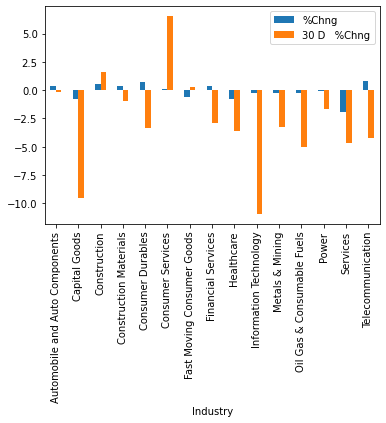

In [116]:
nifty_change[['%Chng','30 D   %Chng']].plot(kind='bar')

In [122]:
nifty_change['color']='lightgreen'
nifty_change.loc[nifty_change[nifty_change['%Chng']<0].index,'color']='orange'

In [123]:
nifty_change

,Company Name,%Chng,30 D %Chng,color
Industry,,,,
Automobile and Auto Components,6,0.405,-0.188333,lightgreen
Capital Goods,1,-0.760,-9.570000,orange
Construction,1,0.520,1.610000,lightgreen
Construction Materials,2,0.375,-0.985000,lightgreen
Consumer Durables,2,0.705,-3.385000,lightgreen
Consumer Services,2,0.135,6.525000,lightgreen
Fast Moving Consumer Goods,4,-0.620,0.300000,orange
Financial Services,12,0.390,-2.894167,lightgreen
Healthcare,4,-0.765,-3.577500,orange


<AxesSubplot:xlabel='Industry'>

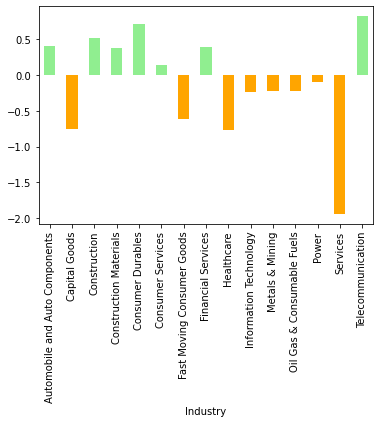

In [124]:
nifty_change['%Chng'].plot(kind='bar', color=nifty_change['color'], legend=False)

In [93]:
nifty_change['%Chng'].idxmax()

'Telecommunication'

In [109]:
nifty_change.loc[nifty_change['%Chng'].idxmax(),'color']='green'
nifty_change.loc[nifty_change['%Chng'].idxmin(),'color']='red'

In [120]:
nifty_change

,Company Name,%Chng,30 D %Chng
Industry,,,
Automobile and Auto Components,6,0.405,-0.188333
Capital Goods,1,-0.760,-9.570000
Construction,1,0.520,1.610000
Construction Materials,2,0.375,-0.985000
Consumer Durables,2,0.705,-3.385000
Consumer Services,2,0.135,6.525000
Fast Moving Consumer Goods,4,-0.620,0.300000
Financial Services,12,0.390,-2.894167
Healthcare,4,-0.765,-3.577500


In [119]:
nifty_change['%Chng'].plot(kind='bar', color=nifty_change['color'], legend=False)

KeyError: 'color'